# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle
sns.set()

## Loading DataSet

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


# Pre-Processing

In [4]:
data.shape

(2000, 9)

c:\users\manoj\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


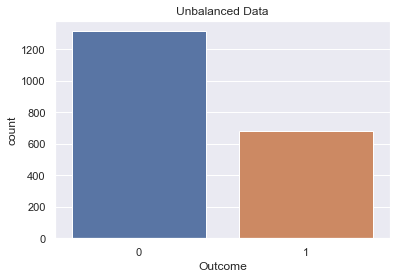

In [5]:
# plotting Dependent Columns
sns.countplot(data["Outcome"])
plt.title("Unbalanced Data")
plt.show()

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [8]:
# Replacing 0 with Median  
a = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for i in a:
    data[i].replace([0],data[i].median(), inplace = True)

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.943000,72.385500,27.52450,99.374000,32.645200,0.470930,33.090500,0.342000
std,3.306063,30.535733,11.949824,9.56374,98.438245,7.190254,0.323553,11.786423,0.474498
min,0.000000,44.000000,24.000000,7.00000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.00000,40.000000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.00000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.00000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.00000,744.000000,80.600000,2.420000,81.000000,1.000000


In [10]:
print(data["Glucose"][data["Glucose"]>140].count())
print(data["Glucose"][data["Glucose"]<70].count())

508
27


In [11]:
data["Glucose"].replace(to_replace = [data["Glucose"][data["Glucose"]>140].values],value = data['Glucose'].median(), inplace = True)
data["Glucose"].replace(to_replace = [data["Glucose"][data["Glucose"]<70].values],value = data['Glucose'].median(), inplace = True)


In [12]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   float64
 2   BloodPressure             2000 non-null   float64
 3   SkinThickness             2000 non-null   float64
 4   Insulin                   2000 non-null   float64
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 140.8 KB


In [14]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
print(data["Pregnancies"][data["Pregnancies"]>8].count())
data["Pregnancies"].replace(to_replace = [data["Pregnancies"][data["Pregnancies"]>8].values], value = data["Pregnancies"].median(),inplace = True)
data["Pregnancies"] = data["Pregnancies"].astype(int)

205


In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.923500,110.648500,72.385500,27.52450,99.374000,32.645200,0.470930,33.090500,0.342000
std,2.274255,15.253599,11.949824,9.56374,98.438245,7.190254,0.323553,11.786423,0.474498
min,0.000000,71.000000,24.000000,7.00000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,23.00000,40.000000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.00000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,4.000000,117.000000,80.000000,32.00000,130.000000,36.800000,0.624000,40.000000,1.000000
max,8.000000,140.000000,122.000000,110.00000,744.000000,80.600000,2.420000,81.000000,1.000000


In [17]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,40.0,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,117.0,72.0,23.0,40.0,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


# Spliting Data

In [18]:
x = data[['Age','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction']]
y = data["Outcome"]

In [19]:
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

# Support Vector

In [20]:
# Using SupportVector Algo
svc = SVC(C =2,gamma = 0.5,kernel="rbf",degree = 5)
svc.fit(X_train,y_train)
pre = svc.predict(x_test)
svc

SVC(C=2, degree=5, gamma=0.5)

In [21]:
print(round(accuracy_score(pre,y_test)*100),"%")
print(classification_report(pre,y_test))

95 %
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       421
           1       0.85      1.00      0.92       179

    accuracy                           0.95       600
   macro avg       0.92      0.96      0.94       600
weighted avg       0.95      0.95      0.95       600



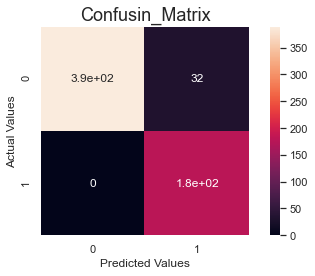

In [22]:
# Plotting Confusion Matrix using Heatmap
sns.heatmap(confusion_matrix(pre,y_test),square= True,annot = True )
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values") 
plt.title("Confusin_Matrix", size = 18)
plt.tight_layout()
plt.show()

In [23]:
# Saving Best model
pickle.dump(svc,open('diabetes.pkl','wb'))